<a href="https://colab.research.google.com/github/itimes-digital/deep-learning-estudo/blob/main/cifar_10_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import StratifiedKFold

In [2]:
seed = 5
np.random.seed(seed)

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [4]:
# 50000 images
# 32 x 32 px
# 3 channels - RGB
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_test.shape

(10000, 1)

In [8]:
y_test[0]

array([3], dtype=uint8)

In [9]:
y_train[1000]

array([9], dtype=uint8)

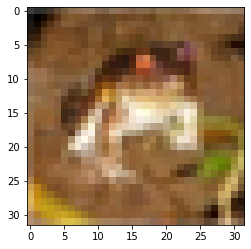

In [10]:
plt.imshow(x_train[0])

In [11]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [13]:
label_names = unpickle('sample_data/batches.meta')
label_names

{b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_cases_per_batch': 10000,
 b'num_vis': 3072}

In [14]:
label_names = label_names[b'label_names']

In [26]:
len(label_names)

10

In [27]:
def get_name(label_names, classfied, index):
    index_class = classfied[index];
    index_class = int(index_class);
    return label_names[index_class].decode('utf-8');

Text(0.5, 1.0, 'Classe truck')

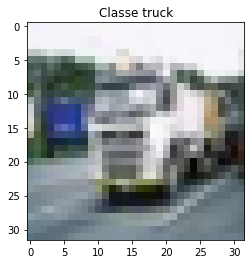

In [28]:
plt.imshow(x_train[1000])
plt.title('Classe ' + str(get_name(label_names, y_train, 1000)))

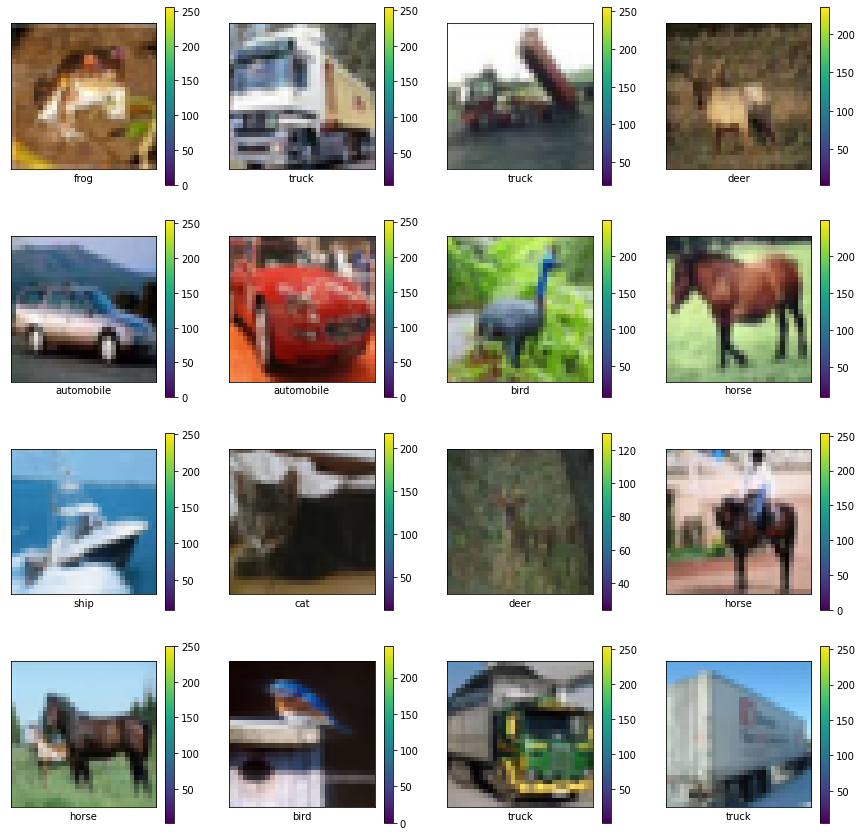

In [29]:
plt.figure(figsize=(15, 15))

for i in range(16):
    plt.subplot(4,4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.colorbar()
    plt.xlabel(get_name(label_names, y_train, i))
    
plt.show()

In [37]:
predictors_x = x_train.reshape(x_train.shape[0], 32, 32, 3)
predictors_x = predictors_x.astype('float32')
predictors_x /= 255

In [38]:
predictors_x.shape

(50000, 32, 32, 3)

In [31]:
y_train.shape

(50000, 1)

In [39]:
class_y = np_utils.to_categorical(y_train[0], 50000)

In [40]:
class_y.shape

(1, 50000)

In [42]:
class_y = class_y.reshape(-1,1)
class_y.shape

(50000, 1)

In [33]:
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = seed)

In [34]:
results = []

In [45]:
for index_train, index_test in kfold.split(predictors_x, np.zeros(shape = (class_y.shape[0], 1))):
  classificator = Sequential()
  classificator.add(Conv2D(32, (3,3), input_shape = (32,32, 3), activation = 'relu'))
  classificator.add(MaxPooling2D(pool_size = (2,2)))
  classificator.add(Flatten())
  classificator.add(Dense(units = 150, activation = 'relu'))
  classificator.add(Dense(units = 250, activation = 'relu'))
  classificator.add(Dense(units = 10, activation = 'softmax'))
  classificator.compile(loss = 'sparse_categorical_crossentropy', 
                        optimizer = 'adam',
                        metrics = ['accuracy'])
  classificator.fit(predictors_x[index_train], class_y[index_train],
                    batch_size = 150,
                    epochs = 10)
  precision = classificator.evaluate(predictors_x[index_test], class_y[index_test])
  results.append(precision[1])

Epoch 1/10
267/267 [==============================] - 25s 94ms/step - loss: 0.0160 - accuracy: 0.9975
Epoch 2/10
267/267 [==============================] - 25s 94ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 3/10
267/267 [==============================] - 25s 93ms/step - loss: 8.3129e-04 - accuracy: 1.0000
Epoch 4/10
267/267 [==============================] - 25s 94ms/step - loss: 8.8271e-04 - accuracy: 1.0000
Epoch 5/10
267/267 [==============================] - 25s 94ms/step - loss: 7.2915e-04 - accuracy: 1.0000
Epoch 6/10
267/267 [==============================] - 25s 94ms/step - loss: 4.0705e-04 - accuracy: 1.0000
Epoch 7/10
267/267 [==============================] - 25s 94ms/step - loss: 5.8893e-04 - accuracy: 1.0000
Epoch 8/10
267/267 [==============================] - 25s 94ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 9/10
267/267 [==============================] - 25s 94ms/step - loss: 4.3398e-04 - accuracy: 1.0000
Epoch 10/10
313/313 [==============================] - 3s 

In [46]:
mean = np.mean(results)
mean

0.9999799966812134